In [1]:
# To install a package from terminal 
# conda install -c conda-forge imbalanced-learn
# or conda install package-name

In [2]:
import pandas as pd
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"

coverage_df = pd.read_csv(DATA_URL,
                      compression="gzip",
                          header=None
                     )

In [16]:
coverage_no_hot_df = coverage_df.copy()
coverage_no_hot_df["soil_type"] = coverage_df.iloc[:,-41:-1].idxmax(axis=1)
coverage_no_hot_df["wilderness"] = coverage_df.iloc[:,-45:-41].idxmax(axis=1)

for column in coverage_df.iloc[:,-45:-1]:
    coverage_no_hot_df.drop(column,
                           axis=1,
                           inplace=True)
print(coverage_no_hot_df)
    

           0    1   2    3    4     5    6    7    8     9  54  soil_type  \
0       2596   51   3  258    0   510  221  232  148  6279   5         42   
1       2590   56   2  212   -6   390  220  235  151  6225   5         42   
2       2804  139   9  268   65  3180  234  238  135  6121   2         25   
3       2785  155  18  242  118  3090  238  238  122  6211   2         43   
4       2595   45   2  153   -1   391  220  234  150  6172   5         42   
5       2579  132   6  300  -15    67  230  237  140  6031   2         42   
6       2606   45   7  270    5   633  222  225  138  6256   5         42   
7       2605   49   4  234    7   573  222  230  144  6228   5         42   
8       2617   45   9  240   56   666  223  221  133  6244   5         42   
9       2612   59  10  247   11   636  228  219  124  6230   5         42   
10      2612  201   4  180   51   735  218  243  161  6222   5         31   
11      2886  151  11  371   26  5253  234  240  136  4051   2         43   

In [27]:
import seaborn as sns

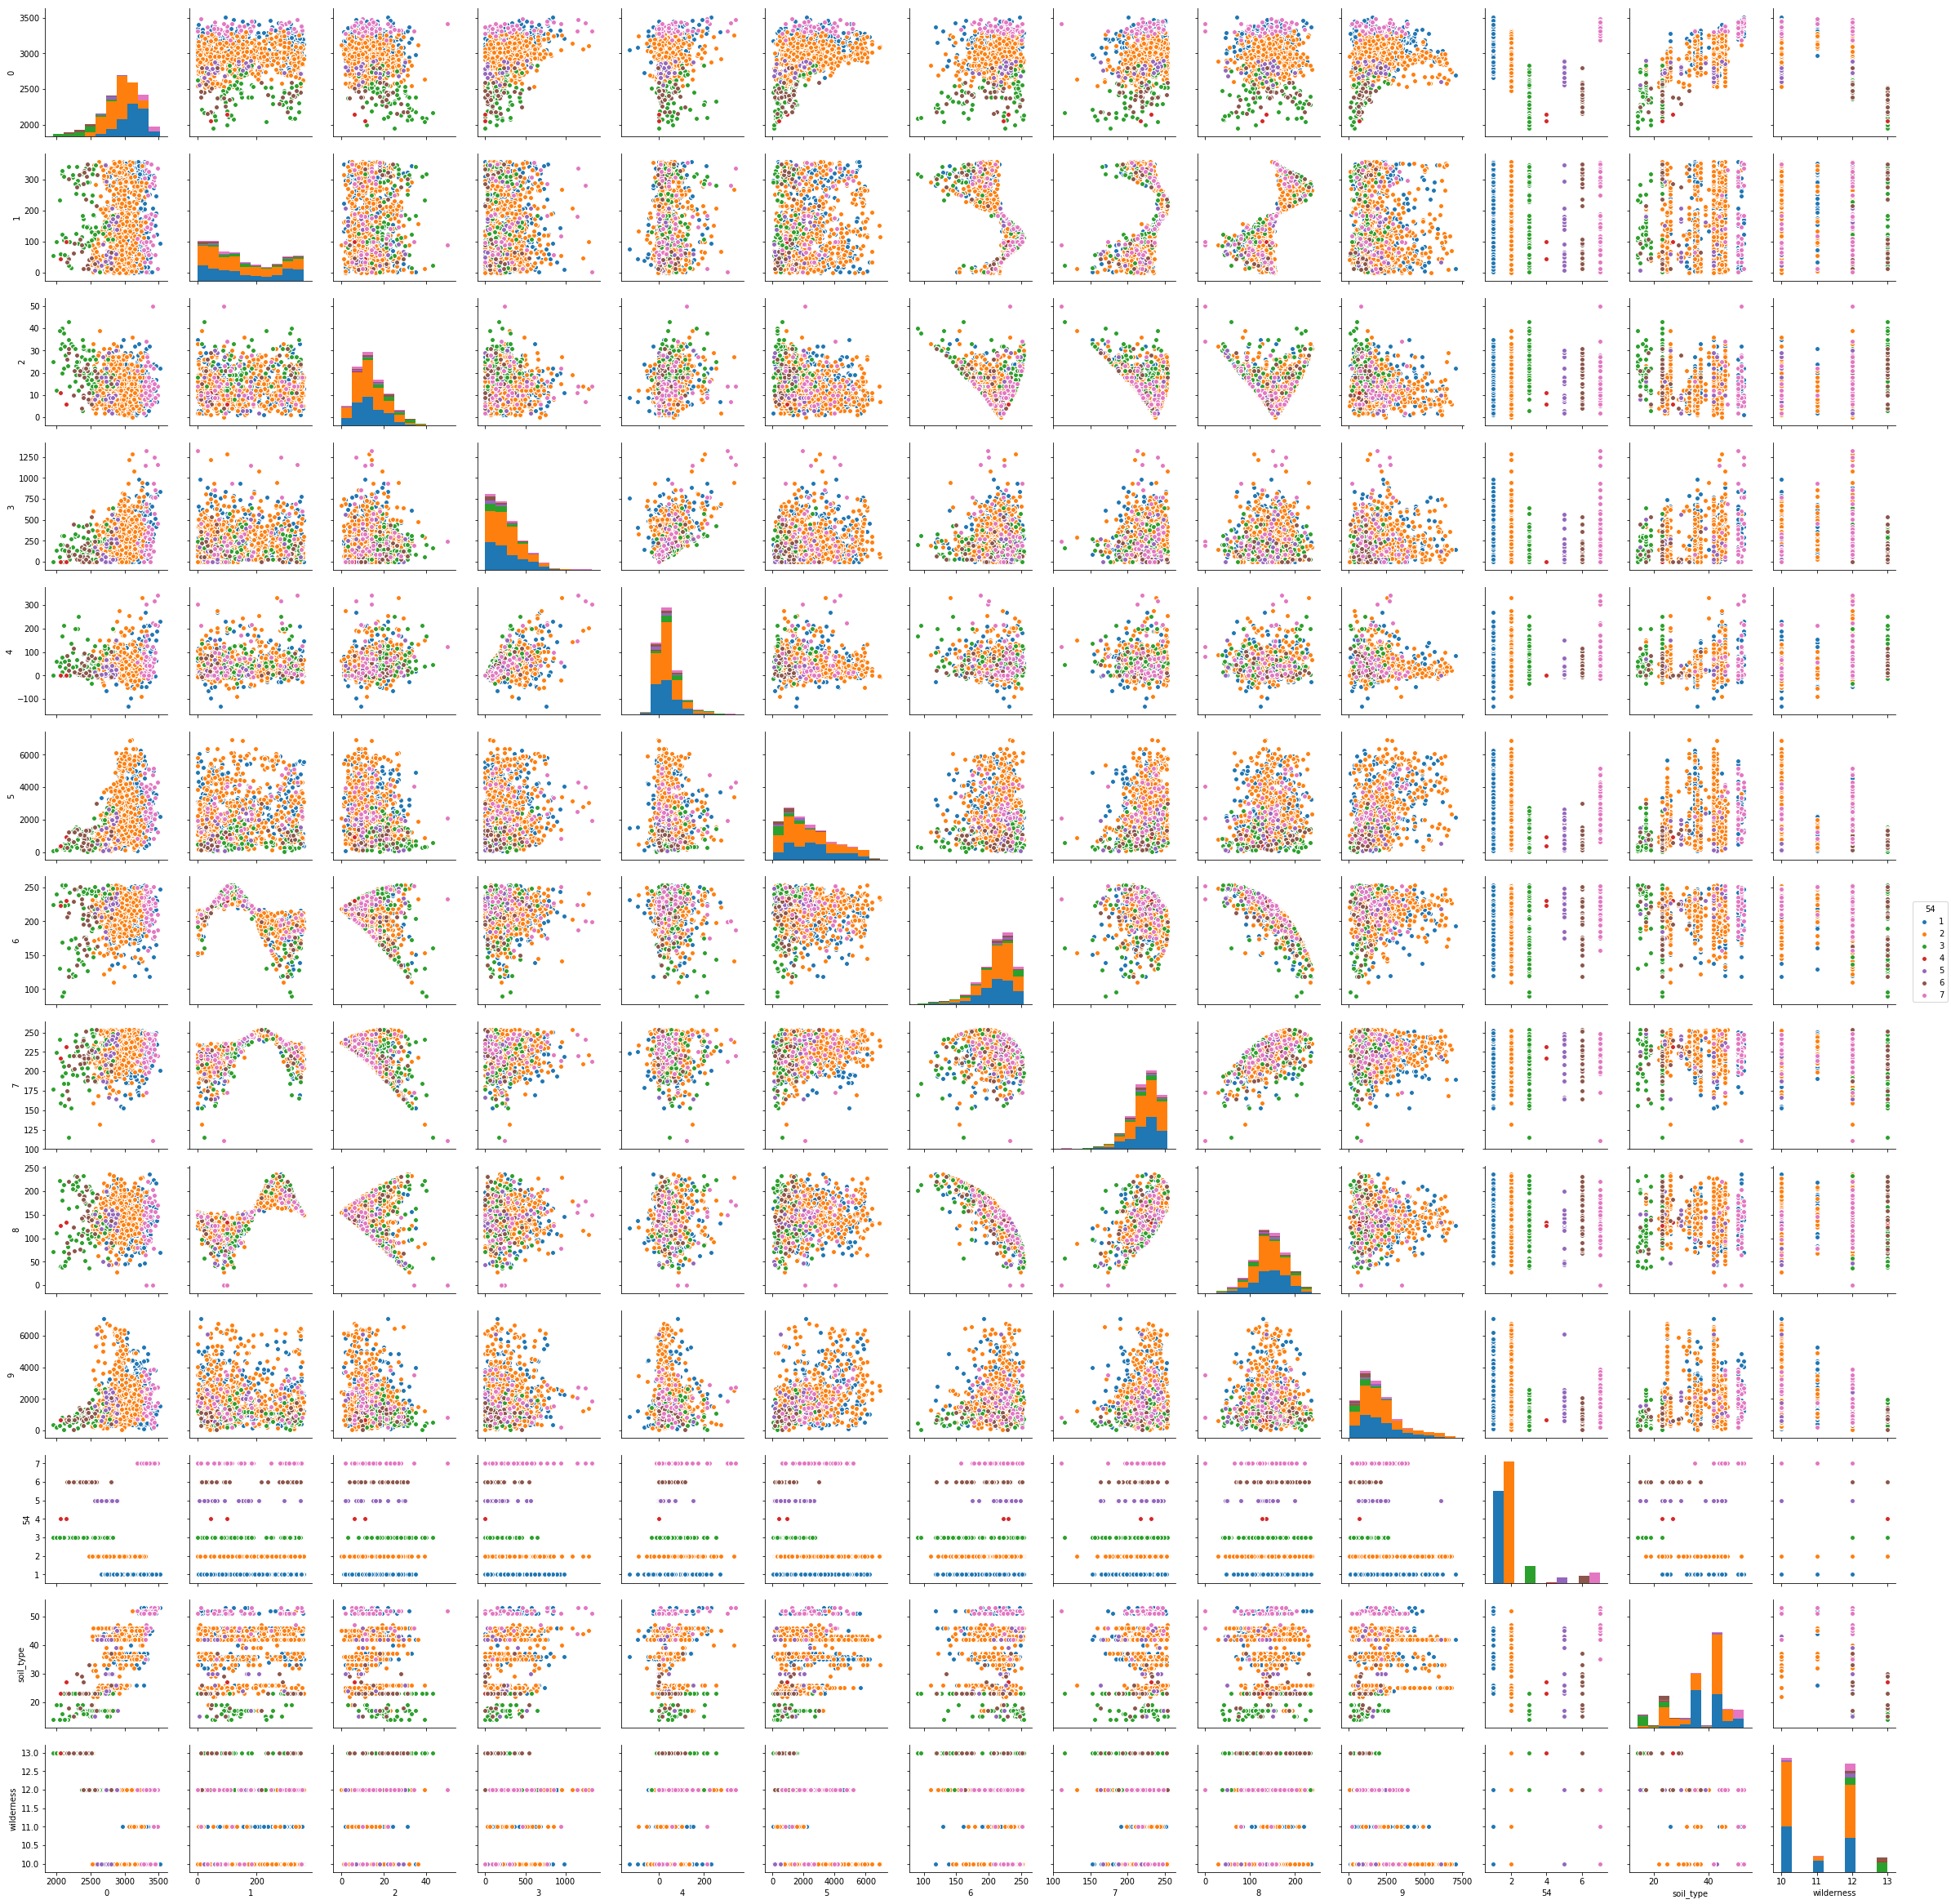

In [18]:
sns.pairplot(coverage_no_hot_df.sample(n=1000),hue=54)

In [6]:
#sns.pairplot(coverage_no_hot_df.sample(n=1000)), hue =cov_not_hot_df[54].astype

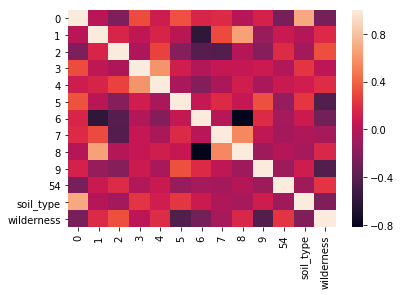

In [17]:
sns.heatmap(coverage_no_hot_df.sample(n=1000).corr())

In [20]:
#len(coverage_df = coverage_df.count) # check for NaN values whihc count ignores

In [34]:
from sklearn import model_selection

small_df = coverage_df.sample(n=1000) #subset for playing 

train_df, test_df= model_selection.train_test_split(small_df)

X_train = train_df.iloc[:,:-1].values #extracts valeus from df as numpy array
y_train = train_df[54].values

X_test = test_df.iloc[:,:-1].values
y_test = test_df[54].values

In [55]:
from sklearn import pipeline,  svm #support vectpr machine
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

svm_clf = pipeline.Pipeline((
                             ("scaler", StandardScaler()),
                             ("kernel_svc", svm.SVC()),
                                                            ))
#clf = RandomForesClassifier()                           
#
#Different classifiers can be used. 
    
svm_clf.fit(X_train, y_train)

svm_clf.score(X_test, y_test)

C:\Users\jam19e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\jam19e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\jam19e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.66

In [32]:
#Cross validation check sfor over fitting
import numpy as np
from sklearn.model_selection import cross_validate
scores = cross_validate(svm_clf, X_train, y_train, cv=10, scoring=["accuracy", "f1_macro"])

accuracy = scores["test_accuracy"]
f1score = scores["test_f1_macro"]
print("CV accuracy = {:.2f}\u00B1{:.2f}%".format(np.mean(accuracy)*100., 2*np.std(accuracy)*100.))
print("CV F1 = {:.2f}\u00B1{:.2f}".format(np.mean(f1score), 2*np.std(f1score)))

C:\Users\jam19e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\jam19e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\jam19e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\jam19e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\jam19e\AppData\Local\Continuum\

CV accuracy = 65.34±11.79%
CV F1 = 0.34±0.12


C:\Users\jam19e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\jam19e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\jam19e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jam19e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\jam19e\AppD

In [24]:
from umap import UMAP
umap = UMAP()
X_reduced_umap = umap.fit_transform(X_train)

C:\Users\jam19e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


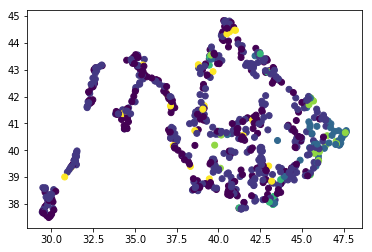

In [26]:
from matplotlib import pyplot as plt
plt.scatter(X_reduced_umap[:,0], X_reduced_umap[:,1], c=y_train)
plt.show()

In [63]:
from sklearn.model_selection import GridSearchCV

#changing parametrs can imporve results
parameters = {'n_estimators': [1,10,100,200],
             'criterion': ("gini", "entropy"),
              'max_depth': [10,100, 500]}

forest = RandomForestClassifier()
clf = GridSearchCV(forest, parameters, cv =5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 10, 100, 200], 'criterion': ('gini', 'entropy'), 'max_depth': [10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 10, 100, 200], 'criterion': ('gini', 'entropy'), 'max_depth': [10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [67]:
#Save the best estimator for later use
from sklearn.externals import joblib
joblib.dump(clf.best_estimator_, "classifier.pkl")

['classifier.pkl']

In [68]:
classifier.predict(X_test)

NameError: name 'classifier' is not defined

In [69]:
def predictor(x):
    classifier = joblib.load("classifier.pkl")
    
    return classifier.predict(x.reshape(1,-1))